In [1]:
import pandas as pd
import glob
import re
import datetime
import matplotlib.pyplot as plt
import time

In [2]:
dailyaggregfiles = glob.glob('*/szokeresores/dailyfreqs/*csv')
df = pd.DataFrame(dailyaggregfiles,columns=['dailyaggregfiles'])

In [3]:
df['client']         = df.apply(lambda r:r['dailyaggregfiles'].split('/')[0],                                           axis=1)
df['dt']             = df.apply(lambda r:datetime.datetime(*[int(e) for e in re.findall(r'\d+',r['dailyaggregfiles'])]),axis=1)
df['yearWeek']       = df.apply(lambda r:'_'.join([repr(r['dt'].isocalendar()[0]), repr(r['dt'].isocalendar()[1])]),    axis=1)
df['yearWeekClient'] = df.apply(lambda r: r['yearWeek']+'_'+r['client'],                                                axis=1)
df.drop(columns=['client','dt','yearWeek'],inplace=True);

In [4]:
gb = df.groupby('yearWeekClient')
dfsByWeekByClient = {group:gb.get_group(group) for group in gb.groups}

In [5]:
weeklyAggregDfByWeekByClient = {key:pd.concat(pd.read_csv(each) for each in value['dailyaggregfiles']
                               ).groupby('Unnamed: 0').sum().sort_values(by='0')
                               for key, value in zip(dfsByWeekByClient.keys(), dfsByWeekByClient.values())}

In [9]:
def writeOutAndPlot(dfdict, key):
    dfdict[key].plot.barh(legend=False)
    plt.xlabel('mentions')
    plt.ylabel('who');
    plt.tight_layout()
    print((lambda key: key.split('_')[-1]+'/szokeresores/weeklyfreqs/'+'_'.join(key.split('_')[:2])+'.png')(key))
    plt.savefig((lambda key: key.split('_')[-1]+'/szokeresores/weeklyfreqs/'+'_'.join(key.split('_')[:2])+'.png')(key))
    plt.close()

DK/szokeresores/weeklyfreqs/2020_27.png
hw
Fidesz/szokeresores/weeklyfreqs/2020_27.png
hw
Főváros/szokeresores/weeklyfreqs/2020_27.png
hw
Jobbik/szokeresores/weeklyfreqs/2020_27.png
hw
KDNP/szokeresores/weeklyfreqs/2020_27.png
hw
LMP/szokeresores/weeklyfreqs/2020_27.png
hw


IndexError: index 0 is out of bounds for axis 0 with size 0

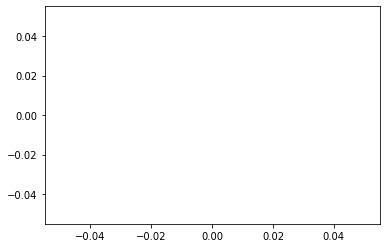

In [11]:
while True:
    yr,week,hour=datetime.datetime.now().isocalendar()[0],datetime.datetime.now().isocalendar()[1],datetime.datetime.now().hour
    for key in weeklyAggregDfByWeekByClient.keys():
        if key.split('_')[0] != yr and key.split('_')[1] != week and not hour < 3:
            writeOutAndPlot(weeklyAggregDfByWeekByClient, key)
            print('hw')
    time.sleep(3*60*60)